# Monte Carlo Simulations

Another method to estimate the probability of winning is through Monte Carlo Simulations. With this method a large number of attacks are simulated whereafter the probability distribution is estimated.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import SimulatedAttack

FILENAME = "winning_probabilites.npy"

## Comparison to theoretical probabilities

The theoretical probabilities from Markov Chain of winning are saved in the file _winning_probabilities.npy_ and can be loaded to be compared to estimated probabilties from Monte Carlo simulations

In [2]:
with open(FILENAME, 'rb') as f:
    winning_probabilities = np.load(f)

winning_probabilities[:2]

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.42, 0.11, 0.03, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

### 1 attacker, 1 defender

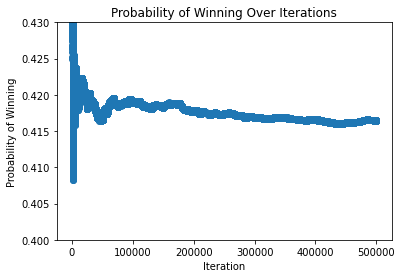

Probability of winning 42%
Theoretical probability 42%


In [3]:
nsim = 500000
win = 0
probabilities = []

for n in range(0, nsim):
    if(SimulatedAttack.simulated_attack(1, 1) == 'W'):
        win += 1
    
    if n != 0:
        probability = win / (n + 1)
        probabilities.append(probability)

# Plot the estimated probability
plt.plot(range(1, nsim), probabilities, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Probability of Winning')
plt.title('Probability of Winning Over Iterations')
plt.ylim(0.40, 0.43)
plt.show()

    
print("Probability of winning {:.0%}".format(win/nsim))
print("Theoretical probability {:.0%}".format(winning_probabilities[1][1]))

### 2 attackers, 1 defender

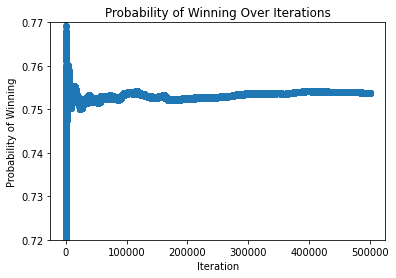

Probability of winning 75%
Theoretical probability 75%


In [4]:
nsim = 500000
win = 0
probabilities = []

for n in range(0, nsim):
    if(SimulatedAttack.simulated_attack(2, 1) == 'W'):
        win += 1
    
    if n != 0:
        probability = win / (n + 1)
        probabilities.append(probability)

# Plot the estimated probability
plt.plot(range(1, nsim), probabilities, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Probability of Winning')
plt.title('Probability of Winning Over Iterations')
plt.ylim(0.72, 0.77)
plt.show()
    
print("Probability of winning {:.0%}".format(win/nsim))
print("Theoretical probability {:.0%}".format(winning_probabilities[2][1]))

## Simulations for more troops

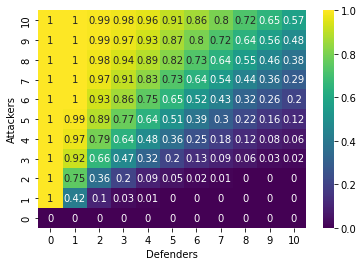

In [6]:
nsim = 20000
maximum_no_troops = 10
estimated_probabilities = np.zeros((maximum_no_troops+1, maximum_no_troops+1))

for a in range(maximum_no_troops+1):
    for d in range(maximum_no_troops+1):
        win = 0
        for n in range(0, nsim):
            if(SimulatedAttack.simulated_attack(a, d) == 'W'):
                win += 1

        probability = win / nsim
        estimated_probabilities[a][d] = round(probability,2)

sns.heatmap(data=estimated_probabilities, annot=True, cmap='viridis')
plt.xlabel("Defenders")
plt.ylabel("Attackers")
plt.ylim(reversed(plt.ylim()))
plt.show()